In [1]:
from env.SoccerActionsEnv import SoccerActionsEnv

import pandas as pd
import numpy as np

import lib.draw as draw
import matplotlib.pyplot as plt
from tqdm import tqdm

import optuna

In [2]:
def calculate_horizontal_position(x, y):
    if x < 0.75:
        if y < 0.25:
            return 0
        elif y < 0.5:
            return 1
        elif y < 0.75:
            return 2
        else:
            return 3
    else:
        if y < 0.2037:
            return 0
        elif y < 0.3653:
            return 1
        elif y < 0.50:
            return 2
        elif y < 0.6347:
            return 3
        elif y < 0.7963:
            return 4
        else:
            return 5

def calculate_square(x, y):
    if x < 0.1666:
        return 0 + calculate_horizontal_position(x, y)
    elif x < 0.3333:
        return 4 + calculate_horizontal_position(x, y)
    elif x < 0.5:
        return 8 + calculate_horizontal_position(x, y)
    elif x < 0.6666:
        return 12 + calculate_horizontal_position(x, y)
    elif x < 0.75:
        return 16 + calculate_horizontal_position(x, y)
    elif x < 0.8428:
        return 20 + calculate_horizontal_position(x, y)
    elif x < 0.9476:
        return 26 + calculate_horizontal_position(x, y)
    else:
        return 32 + calculate_horizontal_position(x, y)

In [3]:
def test_model(action, r, a):
    env = SoccerActionsEnv(randomized_start=True, end_on_xg=True)
    obs = env.reset()

    saving_rewards = []
    for i in tqdm(range(20000)):
        pos = calculate_square(obs[0], obs[1])
        obs, rewards, done, info = env.step([action[pos], r[pos], a[pos]])
        if done:
            saving_rewards.append(info['expectedGoals'])
            env.reset()

    return np.mean(saving_rewards)

In [4]:
df = pd.read_csv('saved_models/optuna_results.csv')

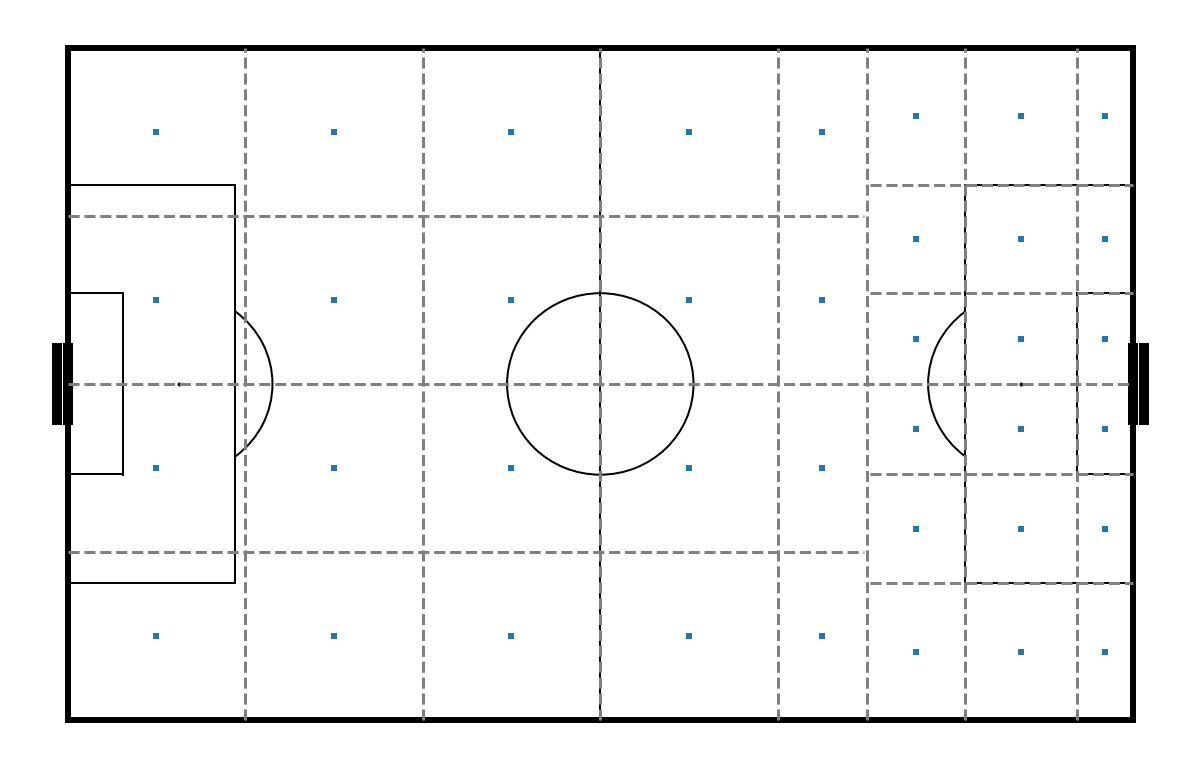

In [5]:
draw.pitch()
scouter_shots = df[df.action < 0.5]
scouter_passes = df[df.action >= 0.5]
plt.scatter(scouter_shots.x, scouter_shots.y, s = 10, c = 'C0', marker = 's', linewidth=0);
for i, row in scouter_passes.iterrows():
    plt.arrow(row['x'], row['y'], 1.5*row.r/abs(row.r) * np.cos((row.a - 0.5) * 2 * np.pi), 1.5*row.r/abs(row.r) * np.sin((row.a - 0.5) * 2 * np.pi), length_includes_head = True, head_width = .7, head_length = .7, color = 'C1')

plt.axvline(16.66, ymin=0.0455, ymax=0.9545, linestyle='--', color='grey')
plt.axvline(33.33, ymin=0.0455, ymax=0.9545, linestyle='--', color='grey')
plt.axvline(50, ymin=0.0455, ymax=0.9545, linestyle='--', color='grey')
plt.axvline(66.66, ymin=0.0455, ymax=0.9545, linestyle='--', color='grey')
plt.axvline(75, ymin=0.0455, ymax=0.9545, linestyle='--', color='grey')
plt.axvline(84.28, ymin=0.0455, ymax=0.9545, linestyle='--', color='grey')
plt.axvline(94.76, ymin=0.0455, ymax=0.9545, linestyle='--', color='grey')

plt.axhline(25, xmin=0.0455, xmax=0.725, linestyle='--', color='grey')
plt.axhline(50, xmin=0.0455, xmax=0.9545, linestyle='--', color='grey')
plt.axhline(75, xmin=0.0455, xmax=0.725, linestyle='--', color='grey')
plt.axhline(20.37, xmin=0.73, xmax=0.9545, linestyle='--', color='grey')
plt.axhline(36.53, xmin=0.73, xmax=0.9545, linestyle='--', color='grey')
plt.axhline(63.47, xmin=0.73, xmax=0.9545, linestyle='--', color='grey')
plt.axhline(79.63, xmin=0.73, xmax=0.9545, linestyle='--', color='grey');